In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set(style = 'white')

In [2]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Test Re-test 

In [3]:
df_test_ss = pd.read_csv('Test Social Support.csv')
df_retest_ss = pd.read_csv('Retest Social Support.csv')
df_test_pwb = pd.read_csv('Test PWB.csv')
df_retest_pwb = pd.read_csv('ReTest PWB.csv')

In [4]:
X_t_ss = df_test_ss['Total']
X_rt_ss = df_retest_ss['Total']
X_t_pwb = df_test_pwb['Total']
X_rt_pwb = df_retest_pwb['Total']

model = LinearRegression()

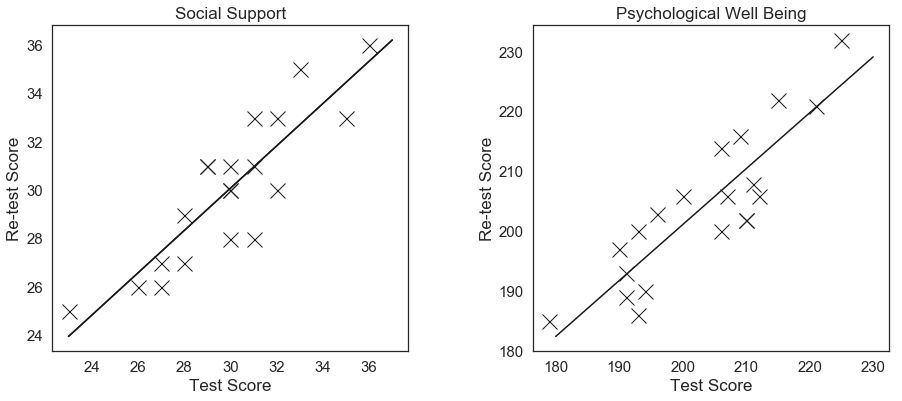

In [5]:
plt.figure(figsize= (15, 6))

plt.subplot(1, 2, 1)
model.fit(X_t_ss[:, np.newaxis], X_rt_ss)

x_fit = np.linspace(23, 37)
y_fit = model.predict(x_fit[:, np.newaxis])
plt.plot(X_t_ss, X_rt_ss, 'kx', markersize = 15)
plt.plot(x_fit, y_fit, 'k')
plt.plot(x_fit, y_fit, 'k')
plt.xlabel('Test Score', size = 17)
plt.ylabel('Re-test Score', size = 17)
plt.xticks([24, 26, 28, 30, 32, 34, 36], size = 15)
plt.yticks([24, 26, 28, 30, 32, 34, 36], size = 15)
plt.title('Social Support', size = 17)

plt.subplot(1, 2, 2)
model.fit(X_t_pwb[:, np.newaxis], X_rt_pwb)

x_fit = np.linspace(180, 230)
y_fit = model.predict(x_fit[:, np.newaxis])
plt.plot(X_t_pwb, X_rt_pwb,  'kx', markersize = 15)
plt.plot(x_fit, y_fit, 'k')
plt.xlabel('Test Score', size = 17)
plt.ylabel('Re-test Score', size = 17)
plt.xticks([180, 190, 200, 210, 220, 230], size = 15)
plt.yticks([180, 190, 200, 210, 220, 230], size = 15)
plt.title('Psychological Well Being', size = 17)

plt.subplots_adjust(wspace = 0.35)
plt.show()

In [6]:
pearsonr(X_t_ss, X_rt_ss)

(0.8690852275550841, 6.606574438449874e-07)

In [7]:
pearsonr(X_t_pwb, X_rt_pwb)

(0.8780955437452764, 3.5985064321662697e-07)

# Main survey

In [8]:
ss_lb = pd.read_csv('SS.Left-behind.csv')
ss_nlb = pd.read_csv('SS.Non-Left-behind.csv')
pwb_lb = pd.read_csv('PWB.Left-behind_1.csv')
pwb_nlb = pd.read_csv('PWB.Non-left-behind.csv')

In [9]:
ss_lb['FamilyType'].head()

0    1
1    1
2    1
3    2
4    2
Name: FamilyType, dtype: int64

In [10]:
df_comb = pd.DataFrame()

df_comb['ss_lb'] = ss_lb.iloc[:, -1]
df_comb['ss_nlb'] = ss_nlb.iloc[:, -1]
df_comb['pwb_lb'] = pwb_lb.iloc[:, -1]
df_comb['pwb_nlb'] = pwb_nlb.iloc[:, -43: -1].sum(axis = 1)

df_comb.head()

,ss_lb,ss_nlb,pwb_lb,pwb_nlb
0,30,35,211,210
1,28,30,207,193
2,28,31,206,210
3,27,30,191,190
4,29,29,209,212


# Distribution 

Make subplot

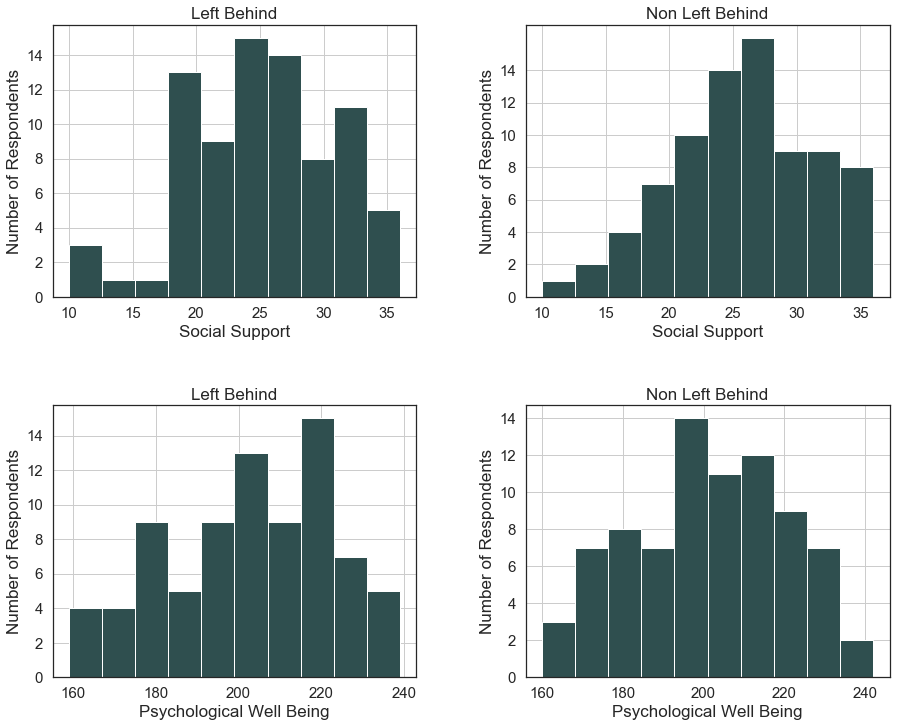

In [11]:
plt.figure(figsize= (15, 12))
plt.subplot(2, 2, 1)
df_comb['ss_lb'].hist(bins = 10, color = 'darkslategrey')
plt.title('Left Behind', size = 17)
plt.xlabel('Social Support', size = 17)
plt.ylabel('Number of Respondents', size = 17)
plt.xticks([10, 15, 20, 25, 30, 35], size = 15)
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], size = 15)

plt.subplot(2,2,2)
df_comb['ss_nlb'].hist(bins = 10, color = 'darkslategrey')
plt.title('Non Left Behind', size = 17)
plt.xlabel('Social Support', size = 17)
plt.ylabel('Number of Respondents', size = 17)
plt.xticks([10, 15, 20, 25, 30, 35], size = 15)
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], size = 15)

plt.subplot(2,2,3)
df_comb['pwb_lb'].hist(bins = 10, color = 'darkslategrey')
plt.title('Left Behind', size = 17)
plt.xlabel('Psychological Well Being', size = 17)
plt.ylabel('Number of Respondents', size = 17)
plt.xticks([160, 180, 200, 220, 240], size = 15)
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], size = 15)

plt.subplot(2,2,4)
df_comb['pwb_nlb'].hist(bins = 10, color = 'darkslategrey')
plt.title('Non Left Behind', size = 17)
plt.xlabel('Psychological Well Being', size = 17)
plt.ylabel('Number of Respondents', size = 17)
plt.xticks([160, 180, 200, 220, 240], size = 15)
plt.yticks([0, 2, 4, 6, 8, 10, 12, 14], size = 15)

plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
plt.show()

# Summary Statistics

Make a box plot 

In [12]:
df_comb.describe()

,ss_lb,ss_nlb,pwb_lb,pwb_nlb
count,80.000000,80.000000,80.000000,80.000000
mean,25.200000,25.700000,202.200000,201.337500
std,5.872916,5.810074,20.199887,19.251792
min,10.000000,10.000000,159.000000,160.000000
25%,21.000000,22.000000,186.250000,190.000000
50%,25.000000,26.000000,205.000000,201.000000
75%,30.000000,30.000000,218.250000,215.000000
max,36.000000,36.000000,239.000000,242.000000


In [13]:
df_new_1 = pd.DataFrame()
df_new_2 = pd.DataFrame()

df_new_1['ss'] = df_comb['ss_lb']
df_new_1['pwb'] = df_comb['pwb_lb']
df_new_1['lb'] = 'YES'

df_new_2['ss'] = df_comb['ss_nlb']
df_new_2['pwb'] = df_comb['pwb_nlb']
df_new_2['lb'] = 'NO'

df_new = df_new_1.append(df_new_2)

In [14]:
df_new.head()

,ss,pwb,lb
0,30,211,YES
1,28,207,YES
2,28,206,YES
3,27,191,YES
4,29,209,YES


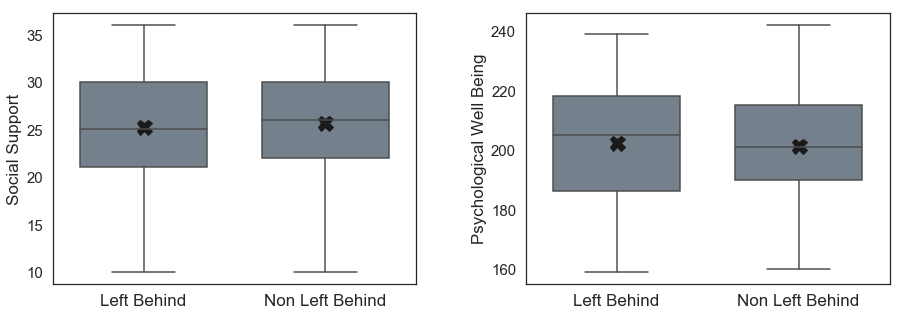

In [15]:
plt.figure(figsize= (15, 5))

plt.subplot(121)
sns.boxplot('lb', 'ss', data = df_new, width = 0.7, color = 'slategrey') 
            #palette=  'gray')
plt.plot(0, df_comb['ss_lb'].mean(), 'kX', markersize = 15)
plt.plot(1, df_comb['ss_nlb'].mean(), 'kX', markersize = 15)
plt.xlabel(None)
plt.ylabel('Social Support', size = 17)
plt.xticks([0, 1], ['Left Behind', 'Non Left Behind'], size = 17)
plt.yticks([10, 15, 20, 25, 30, 35], size = 15)

plt.subplot(122)
sns.boxplot('lb', 'pwb', data = df_new, width = 0.7, color = 'slategrey')
            #palette=  'binary')
plt.plot(0, df_comb['pwb_lb'].mean(), 'kX', markersize = 15)
plt.plot(1, df_comb['pwb_nlb'].mean(), 'kX', markersize = 15)
plt.xlabel(None)
plt.ylabel('Psychological Well Being', size = 17)
plt.xticks([0, 1], ['Left Behind', 'Non Left Behind'], size = 17)
plt.yticks([160, 180, 200, 220, 240], size = 15)

plt.subplots_adjust(wspace = 0.3)
plt.show()

# Correlation 

Find pearson correlation and its p-value

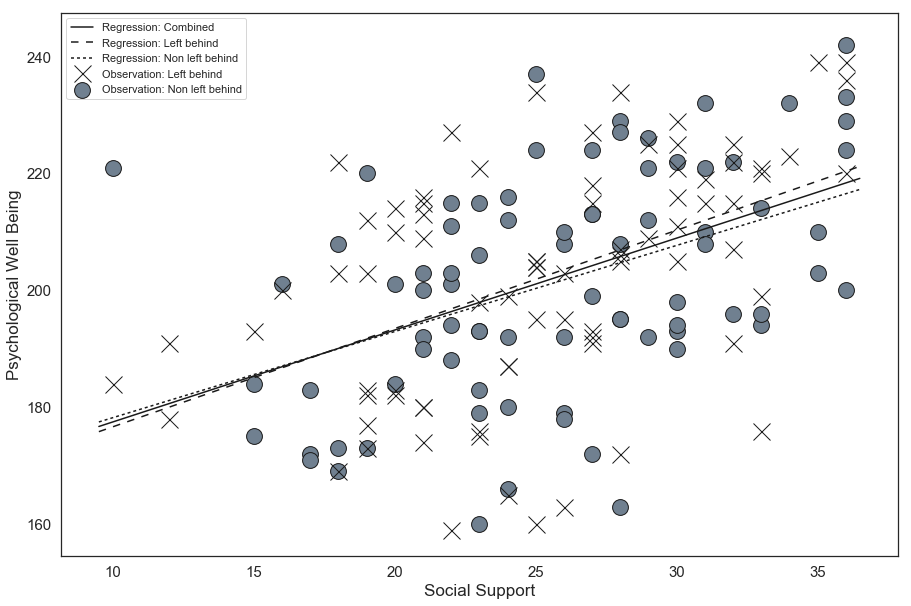

In [16]:
plt.figure(figsize= (15, 10))

x_fit = np.linspace(9.5, 36.5)

ss_total = df_comb['ss_lb'].append(df_comb['ss_nlb'])
pwb_total = df_comb['pwb_lb'].append(df_comb['pwb_nlb'])
model.fit(ss_total[:, np.newaxis], pwb_total )
y_fit = model.predict(x_fit[:, np.newaxis])
plt.plot(x_fit, y_fit, 'k')

model.fit(df_comb['ss_lb'][:, np.newaxis], df_comb['pwb_lb'])
y_fit = model.predict(x_fit[:, np.newaxis])
plt.plot(x_fit, y_fit, 'k', dashes=[5, 5])

model.fit(df_comb['ss_nlb'][:, np.newaxis], df_comb['pwb_nlb'])
y_fit = model.predict(x_fit[:, np.newaxis])
plt.plot(x_fit, y_fit, 'k', dashes=[2, 2])

plt.plot(df_comb['ss_lb'], df_comb['pwb_lb'], 'kx', markersize = 17)
plt.scatter(df_comb['ss_nlb'], df_comb['pwb_nlb'], s = 250, facecolors= 'slategrey', edgecolors = 'k')
plt.xlabel('SS')
plt.ylabel('PWB')
plt.legend(['Left Behind', 'Non Left Behind'])
plt.xlabel('Social Support', size = 17)
plt.ylabel('Psychological Well Being', size = 17)
plt.xticks([10, 15, 20, 25, 30, 35], size = 15)
plt.yticks([160, 180, 200, 220, 240], size = 15)

plt.legend(['Regression: Combined', 'Regression: Left behind', 'Regression: Non left behind', 
            'Observation: Left behind', 'Observation: Non left behind'])

plt.show()

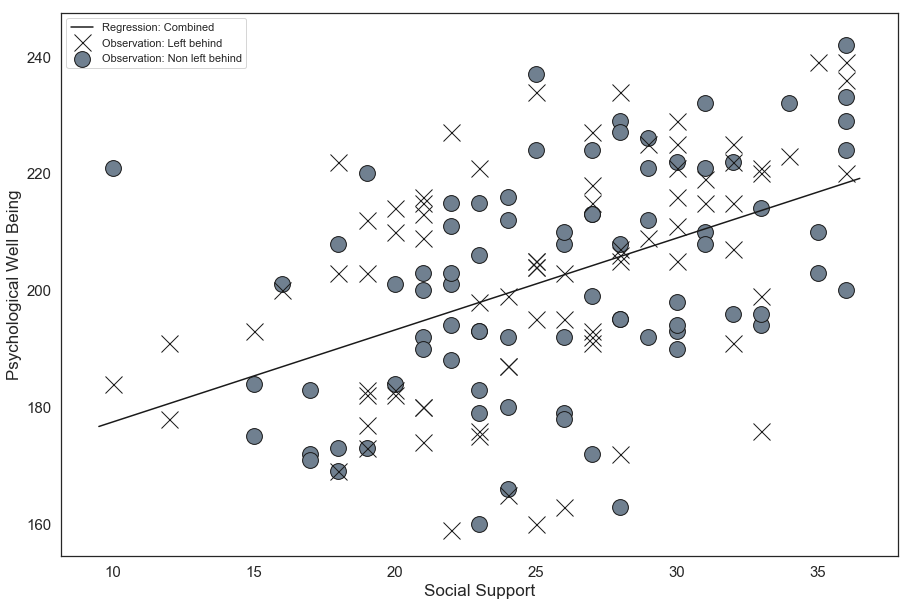

In [17]:
plt.figure(figsize= (15, 10))

x_fit = np.linspace(9.5, 36.5)
ss_total = df_comb['ss_lb'].append(df_comb['ss_nlb'])
pwb_total = df_comb['pwb_lb'].append(df_comb['pwb_nlb'])
model.fit(ss_total[:, np.newaxis], pwb_total )
y_fit = model.predict(x_fit[:, np.newaxis])
p1 = plt.plot(x_fit, y_fit, 'k')

p2 = plt.plot(df_comb['ss_lb'], df_comb['pwb_lb'], 'kx', markersize = 17)
p3 = plt.scatter(df_comb['ss_nlb'], df_comb['pwb_nlb'], s = 250, facecolors= 'slategrey', edgecolors = 'k')
plt.xlabel('SS')
plt.ylabel('PWB')
plt.legend(['Left Behind', 'Non Left Behind'])
# plt.title('Scatter Plot of Psychological Well Being vs Social Support', size = 17)
plt.xlabel('Social Support', size = 17)
plt.ylabel('Psychological Well Being', size = 17)
plt.xticks([10, 15, 20, 25, 30, 35], size = 15)
plt.yticks([160, 180, 200, 220, 240], size = 15)

plt.legend(['Regression: Combined', 'Observation: Left behind', 'Observation: Non left behind'])
plt.show()

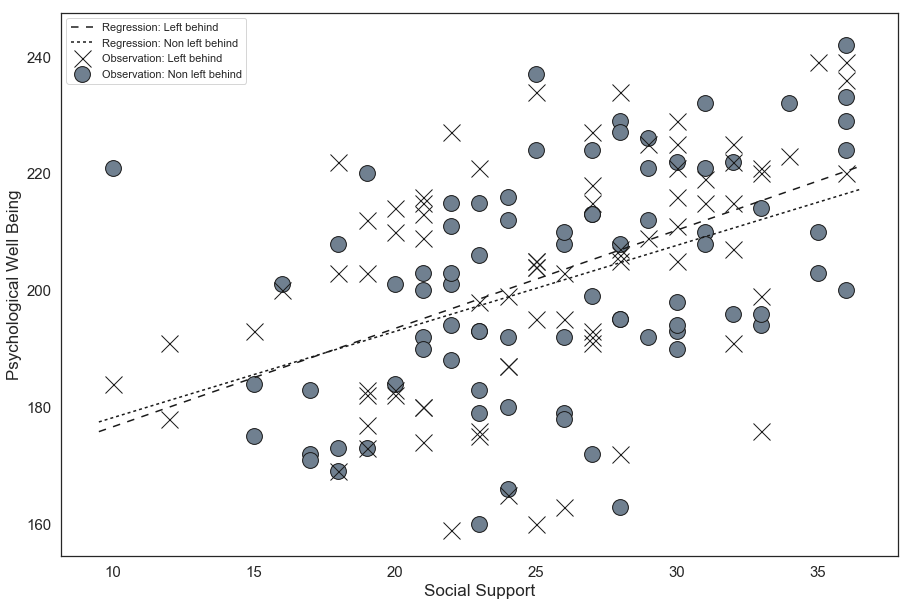

In [18]:
plt.figure(figsize= (15, 10))

x_fit = np.linspace(9.5, 36.5)

model.fit(df_comb['ss_lb'][:, np.newaxis], df_comb['pwb_lb'])
y_fit = model.predict(x_fit[:, np.newaxis])
p3 = plt.plot(x_fit, y_fit, 'k', dashes=[5, 5])
model.fit(df_comb['ss_nlb'][:, np.newaxis], df_comb['pwb_nlb'])
y_fit = model.predict(x_fit[:, np.newaxis])
p4 = plt.plot(x_fit, y_fit, 'k', dashes=[2, 2])

p1 = plt.plot(df_comb['ss_lb'], df_comb['pwb_lb'], 'kx', markersize = 17)
p2 = plt.scatter(df_comb['ss_nlb'], df_comb['pwb_nlb'], s = 250, facecolors= 'slategrey', edgecolors = 'k')
plt.xlabel('SS')
plt.ylabel('PWB')
plt.legend(['Left Behind', 'Non Left Behind'])
plt.xlabel('Social Support', size = 17)
plt.ylabel('Psychological Well Being', size = 17)
plt.xticks([10, 15, 20, 25, 30, 35], size = 15)
plt.yticks([160, 180, 200, 220, 240], size = 15)

plt.legend(['Regression: Left behind', 'Regression: Non left behind', 
            'Observation: Left behind', 'Observation: Non left behind'])
plt.show()

In [19]:
pearsonr(df_comb['ss_lb'], df_comb['pwb_lb'])

(0.4887778597529663, 4.2233777567127844e-06)

In [20]:
pearsonr(df_comb['ss_nlb'], df_comb['pwb_nlb'])

(0.4446447379721704, 3.594409239402279e-05)

In [21]:
pearsonr(df_comb['ss_lb'].append(df_comb['ss_nlb']), df_comb['pwb_lb'].append(df_comb['pwb_nlb']))

(0.4657872437165746, 5.413315848670705e-10)

# t-Test 

In [22]:
mean_ss_lb = df_comb['ss_lb'].mean()
mean_ss_nlb = df_comb['ss_nlb'].mean()
mean_pwb_lb = df_comb['pwb_lb'].mean()
mean_pwb_nlb = df_comb['pwb_nlb'].mean()

In [23]:
std_ss_lb = df_comb['ss_lb'].std()
std_ss_nlb = df_comb['ss_nlb'].std()
std_pwb_lb = df_comb['pwb_lb'].std()
std_pwb_nlb = df_comb['pwb_nlb'].std()

In [24]:
mean_diff_ss = mean_ss_lb - mean_ss_nlb
mean_diff_pwb = mean_pwb_lb - mean_pwb_nlb

In [25]:
n = len(df_comb)

se_ss = np.sqrt(std_ss_lb ** 2 /n + std_ss_nlb ** 2 /n )
se_pwb = np.sqrt(std_pwb_lb ** 2 /n + std_pwb_nlb ** 2 /n )

In [26]:
mean_diff_ss/se_ss

-0.5413394921215295

In [27]:
mean_diff_pwb/se_pwb

0.27645740798676

# Family type 

In [28]:
df_comb['Family_type_lb'] = ss_lb['FamilyType']
df_comb['Family_type_nlb'] = ss_nlb['FamilyType']

df_comb.head()

,ss_lb,ss_nlb,pwb_lb,pwb_nlb,Family_type_lb,Family_type_nlb
0,30,35,211,210,1,1
1,28,30,207,193,1,2
2,28,31,206,210,1,1
3,27,30,191,190,2,2
4,29,29,209,212,2,1


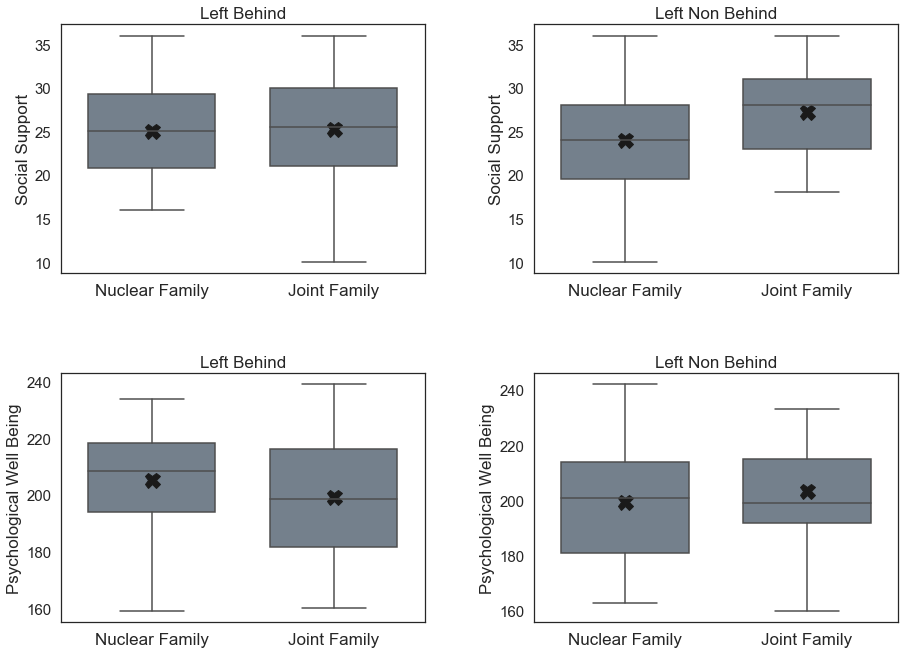

In [29]:
plt.figure(figsize= (15, 11))
plt.subplot(221)
sns.boxplot('Family_type_lb', 'ss_lb', data = df_comb,width = 0.7, color = 'slategrey')
plt.plot(0, df_comb[df_comb['Family_type_lb'] == 1]['ss_lb'].mean(), 'kX', markersize = 15)
plt.plot(1, df_comb[df_comb['Family_type_lb'] == 2]['ss_lb'].mean(), 'kX', markersize = 15)
plt.title('Left Behind', size = 17)
plt.xlabel(None)
plt.ylabel('Social Support', size = 17)
plt.xticks([0, 1], ['Nuclear Family', 'Joint Family'], size = 17)
plt.yticks([10, 15, 20, 25, 30, 35], size = 15)

plt.subplot(222)
sns.boxplot('Family_type_nlb', 'ss_nlb', data = df_comb, width = 0.7, color = 'slategrey')
plt.plot(0, df_comb[df_comb['Family_type_nlb'] == 1]['ss_nlb'].mean(), 'kX', markersize = 15)
plt.plot(1, df_comb[df_comb['Family_type_nlb'] == 2]['ss_nlb'].mean(), 'kX', markersize = 15)
plt.title('Left Non Behind', size = 17)
plt.xlabel(None)
plt.ylabel('Social Support', size = 17)
plt.xticks([0, 1], ['Nuclear Family', 'Joint Family'], size = 17)
plt.yticks([10, 15, 20, 25, 30, 35], size = 15)

plt.subplot(223)
sns.boxplot('Family_type_lb', 'pwb_lb', data = df_comb, width = 0.7, color = 'slategrey')
plt.plot(0, df_comb[df_comb['Family_type_lb'] == 1]['pwb_lb'].mean(), 'kX', markersize = 15)
plt.plot(1, df_comb[df_comb['Family_type_lb'] == 2]['pwb_lb'].mean(), 'kX', markersize = 15)
plt.yticks([160, 180, 200, 220, 240])
plt.title('Left Behind', size = 17)
plt.xlabel(None)
plt.ylabel('Psychological Well Being', size = 17)
plt.xticks([0, 1], ['Nuclear Family', 'Joint Family'], size = 17)
plt.yticks([160, 180, 200, 220, 240], size = 15)

plt.subplot(224)
sns.boxplot('Family_type_nlb', 'pwb_nlb', data = df_comb, width = 0.7, color = 'slategrey')
plt.plot(0, df_comb[df_comb['Family_type_nlb'] == 1]['pwb_nlb'].mean(), 'kX', markersize = 15)
plt.plot(1, df_comb[df_comb['Family_type_nlb'] == 2]['pwb_nlb'].mean(), 'kX', markersize = 15)
plt.title('Left Non Behind', size = 17)
plt.xlabel(None)
plt.ylabel('Psychological Well Being', size = 17)
plt.xticks([0, 1], ['Nuclear Family', 'Joint Family'], size = 17)
plt.yticks([160, 180, 200, 220, 240], size = 15)

plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
plt.show()

# t - Test by Family type

In [30]:
mean_ss_lb_1 = df_comb[df_comb['Family_type_lb'] == 1]['ss_lb'].mean()
mean_ss_lb_2 = df_comb[df_comb['Family_type_lb'] == 2]['ss_lb'].mean()
mean_ss_nlb_1 = df_comb[df_comb['Family_type_nlb'] == 1]['ss_nlb'].mean()
mean_ss_nlb_2 = df_comb[df_comb['Family_type_nlb'] == 2]['ss_nlb'].mean()

mean_pwb_lb_1 = df_comb[df_comb['Family_type_lb'] == 1]['pwb_lb'].mean()
mean_pwb_lb_2 = df_comb[df_comb['Family_type_lb'] == 2]['pwb_lb'].mean()
mean_pwb_nlb_1 = df_comb[df_comb['Family_type_nlb'] == 1]['pwb_nlb'].mean()
mean_pwb_nlb_2 = df_comb[df_comb['Family_type_nlb'] == 2]['pwb_nlb'].mean()

In [31]:
print(mean_ss_lb_1)
print(mean_ss_lb_2)
print(mean_ss_nlb_1)
print(mean_ss_nlb_2)

print('')

print(mean_pwb_lb_1)
print(mean_pwb_lb_2)
print(mean_pwb_nlb_1)
print(mean_pwb_nlb_2)

25.075
25.325
24.05128205128205
27.26829268292683

205.075
199.325
199.28205128205127
203.29268292682926


In [32]:
std_ss_lb_1 = df_comb[df_comb['Family_type_lb'] == 1]['ss_lb'].std()
std_ss_lb_2 = df_comb[df_comb['Family_type_lb'] == 2]['ss_lb'].std()
std_ss_nlb_1 = df_comb[df_comb['Family_type_nlb'] == 1]['ss_nlb'].std()
std_ss_nlb_2 = df_comb[df_comb['Family_type_nlb'] == 2]['ss_nlb'].std()

std_pwb_lb_1 = df_comb[df_comb['Family_type_lb'] == 1]['pwb_lb'].std()
std_pwb_lb_2 = df_comb[df_comb['Family_type_lb'] == 2]['pwb_lb'].std()
std_pwb_nlb_1 = df_comb[df_comb['Family_type_nlb'] == 1]['pwb_nlb'].std()
std_pwb_nlb_2 = df_comb[df_comb['Family_type_nlb'] == 2]['pwb_nlb'].std()

In [33]:
print(std_ss_lb_1)
print(std_ss_lb_2)
print(std_ss_nlb_1)
print(std_ss_nlb_2)

print('')

print(std_pwb_lb_1)
print(std_pwb_lb_2)
print(std_pwb_nlb_1)
print(std_pwb_nlb_2)

5.234929529562664
6.5138412787792275
6.194006941980365
5.005119330465072

18.60023090565248
21.531595746358775
20.98614670625001
17.480337385815847


In [34]:
mean_ss_diff_lb = mean_ss_lb_1 - mean_ss_lb_2
mean_ss_diff_nlb = mean_ss_nlb_1 - mean_ss_nlb_2

mean_pwb_diff_lb = mean_pwb_lb_1 - mean_pwb_lb_2
mean_pwb_diff_nlb = mean_pwb_nlb_1 - mean_pwb_nlb_2

In [35]:
n_lb_1 = sum(df_comb['Family_type_lb'] == 1)
n_nlb_1 = sum(df_comb['Family_type_nlb'] == 1)

n_lb_2 = 80 - n_lb_1
n_nlb_2 = 80 - n_nlb_1

In [36]:
print(n_nlb_1)
print(n_nlb_2)

39
41


In [37]:
se_ss_lb = np.sqrt(std_ss_lb_1 ** 2 /n_lb_1 + std_ss_lb_2 ** 2 /n_lb_2)
se_ss_nlb = np.sqrt(std_ss_nlb_1 ** 2 /n_nlb_1 + std_ss_nlb_2 ** 2 /n_nlb_2)

se_pwb_lb = np.sqrt(std_pwb_lb_1 ** 2 /n_lb_1 + std_pwb_lb_2 ** 2 /n_lb_2 )
se_pwb_nlb = np.sqrt(std_pwb_nlb_1 ** 2 /n_lb_1 + std_pwb_nlb_2 ** 2 /n_nlb_2 )

In [38]:
mean_ss_diff_lb/se_ss_lb

-0.18920588112249864

In [39]:
mean_ss_diff_nlb/se_ss_nlb

-2.5474595995306157

In [40]:
mean_pwb_diff_lb/se_pwb_lb

1.2781105991954638

In [41]:
mean_pwb_diff_nlb/se_pwb_nlb

-0.9333818343359542